In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
print(train.info())
print(train.describe())
print(train.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
user_id                     1176 non-null int64
Age                         1176 non-null int64
Attrition                   1176 non-null object
BusinessTravel              1176 non-null object
DailyRate                   1176 non-null int64
Department                  1176 non-null object
DistanceFromHome            1176 non-null int64
Education                   1176 non-null int64
EducationField              1176 non-null object
EmployeeCount               1176 non-null int64
EmployeeNumber              1176 non-null int64
EnvironmentSatisfaction     1176 non-null int64
Gender                      1176 non-null object
HourlyRate                  1176 non-null int64
JobInvolvement              1176 non-null int64
JobLevel                    1176 non-null int64
JobRole                     1176 non-null object
JobSatisfaction             1176 non-null int64
MaritalStatus          

In [11]:
train['Attrition'] = train['Attrition'].map(lambda x: 1 if x=='Yes' else 0)
test['Attrition'] = -1
test = test[train.columns]
data = pd.concat([train, test])
cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
data = data.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours'], axis=1)

for attr in cols:
    new_attr = pd.DataFrame()
    new_attr = pd.get_dummies(data[attr],prefix=attr)
    data = pd.concat([data, new_attr], axis=1)
    data = data.drop([attr], axis=1)
train = data[data['Attrition'] != -1]
test = data[data['Attrition'] == -1]
test = test.drop('Attrition', axis=1)

In [12]:
train.head()

,user_id,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1374,58,0,605,21,3,4,72,3,4,...,0,0,0,0,0,1,0,1,0,1
1,1092,45,0,950,28,3,4,97,3,1,...,0,1,0,0,0,1,0,1,1,0
2,768,40,0,300,26,3,3,74,3,2,...,0,0,1,0,0,1,0,1,1,0
3,569,36,0,1434,8,4,1,76,2,3,...,0,0,1,0,0,0,1,1,1,0
4,911,25,1,599,24,1,3,73,1,1,...,0,0,0,1,0,0,1,1,0,1


In [20]:
# from sklearn.feature_extraction import DictVectorizer
# dve = DictVectorizer(sparse=False)

# 归一化数值比较大的向量
Min_max_cols=['TotalWorkingYears', 'Age', 'MonthlyIncome', 'DailyRate', 'DistanceFromHome', 'HourlyRate']
for col in Min_max_cols:
    min_max = MinMaxScaler()
    train[col] = min_max.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = min_max.transform(test[col].values.reshape(-1, 1))



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED 

[-2.66599367e+01 -1.24877367e+01  2.71067099e+01  1.61242458e+01
 -5.23984572e+01  3.30447165e+00 -3.76876755e+01 -9.26810412e+01
 -5.57312505e+01 -2.21053930e+01  7.20504188e-03  8.89381547e+00
  1.16027801e+01  3.26371118e+01 -1.05063214e+01 -7.54338536e+01
 -1.74122267e+01 -1.71415927e+01 -1.70229236e+01  1.67719048e+01
 -2.87522105e+01  8.08645378e+00 -1.49692484e+01 -2.55025659e+01
  5.14254298e+01 -1.60521209e+01  6.04614682e+00 -3.69752525e+01
  4.07998487e+01  8.00208774e+00 -1.87159609e+01  2.60507173e+01
 -3.13230828e+01  2.43460366e+00  2.34223780e+01 -1.25198064e+01
  2.23905494e+01 -1.39576662e+01  8.62390130e+00  3.36267875e+01
 -1.29175492e+01 -2.16019759e+01 -1.52920521e+01 -1.45901407e+01
  1.21819574e+01  3.37974808e+01 -2.85235265e+01 -2.86567055e+01
  6.70509750e+01  9.87074303e+00 -9.01292570e+01  1.00000000e+02]


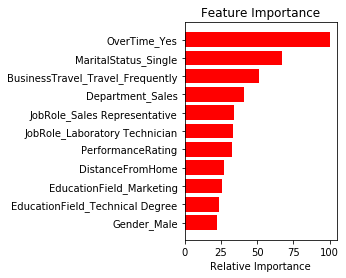

In [22]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

def show_feature_importance(feature_list, feature_importance):
    # 设定阈值
    fi_threshold = 20
    # 重要特征的下标
    important_idx = np.where(feature_importance > fi_threshold)[0]
    # 特征名称
    important_features = [feature_list[i] for i in important_idx]
    # 重要特征
    sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
    # 可视化
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    plt.subplot(1, 2, 2)
    plt.title('Feature Importance')
    plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], color='r',align='center')
    plt.yticks(pos, [important_features[i] for i in sorted_idx[::-1]])
    plt.xlabel('Relative Importance')
    plt.draw()
    plt.show()

# 采用LR模型
model = LogisticRegression(max_iter=100, verbose=True, random_state=33, tol=1e-4)
model.fit(train.drop(['user_id', 'Attrition'], axis=1), train['Attrition'])

# 获取特征重要性
feature_importance = coef = model.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
#feature_importance = -100.0 * (feature_importance / feature_importance.max())
print(feature_importance)
# 重要特征可视化
show_feature_importance(train.drop(['user_id', 'Attrition'],axis=1).columns, feature_importance)

In [23]:
predict = model.predict_proba(test.drop('user_id', axis=1))

In [26]:
submission = pd.DataFrame({'user_id': test['user_id'], 'Attrition': predict[:, 1]})
submission.to_csv("submission_lr2.csv", index=False, sep=',', columns=['user_id', 'Attrition'])

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(random_state=10)
model2.fit(train.drop(['user_id','Attrition'], axis=1), train['Attrition'])
predict = model2.predict_proba(test.drop('user_id', axis=1))[:, 1]
submission = pd.DataFrame({'user_id': test['user_id'], 'Attrition': predict})
submission.to_csv("submission_gb2.csv", index=False, sep=',', columns=['user_id', 'Attrition'])